In [16]:
import csv
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# **IT1244 Project: Breast Cancer Classification**

**Objective:**
The objective of this project is to effectively identify whether a patient is suffering from Breast Cancer using Machine Learning Algorithms

The dataset:
[Breast Cancer Dataset](https://drive.google.com/file/d/1kr0sCKIRcXrPWwSgcMvfnaTL838sE9h-/view?usp=share_link)

# **Load Dataset**

In [2]:
#CSV reader function to read the dataset file
def read_csv(filename):
    rows = []
    with open(filename) as csvfile:
        file_reader = csv.reader(csvfile)
        for row in file_reader:
            rows.append(row)
    return rows

When you run this code, the attributes in the dataset will be extracted from the csv file and stored in the variables below:

In [3]:
headers = read_csv('data.csv')[0] #list that contains the different headers of of the dataset
data = read_csv('data.csv')[1:] #list of lists that contains the different attributes of each patient in the dataset

#**Filtering Out Relevant Data from the Dataset**

In [4]:
#list of headers of relevant attributes
r_data_head = ['radius', 'texture', 'perimalignanteter', 'area', 'comalignantpactness_malignantean', 'concavity', 'point_concavity', 'smalignantoothness_malignantean', 'dimalignant_fractal']

head_result = ['diagnosis'] #header of data containing diagnosis of each patient

#function to create an array that can be used to filter out the relevant headers
def relevant_header_selection(header, y):
    lst = []
    for i in header:
        if i in y:
            lst.append(True)
        else:
            lst.append(False)
    return np.array(lst)

#function to extract relevant data attributes from the raw dataset
def relevant_data(data, selector):
    x = np.array(data)
    return x[:, selector]

#function to convert the diagnosis into binary: 1 for malignant and 0 for benign
def binary_conversion(data):
    lst = []
    for i in data:
        if i == 'benign':
            lst.append(0)
        elif i == 'malignant':
            lst.append(1)
    return np.array(lst)

When you run this code, the relevant data will be stored in the variables below:

In [5]:
hd_selector = relevant_header_selection(headers, r_data_head)

result_index = relevant_header_selection(headers, head_result)
result_array = relevant_data(data, result_index)
result = binary_conversion(result_array)

rdata = relevant_data(data, hd_selector)

# **Standardising Data**

In [6]:
#function to standardize the dataset
def Standardize(data):
    std = StandardScaler()
    x = std.fit_transform(data)
    return x

When you run this code, the relevant data will be standardised and stored in the vairable below:

In [8]:
std_data = Standardize(rdata)

# **Confusion Matrix Visualizer**

In [7]:
def visualise_cm(pred, test):
    cm = confusion_matrix(test, pred)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign', 'malignant'])
    cm_disp.plot()
    plt.show()

# **Split Dataset into Training and Testing Sets**



When you run this code, the standardised dataset will be split into Training and Testing Sets, with the Testing Set containg 25% of the total dataset:

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(std_data, result, test_size=0.25, random_state=0) #splits dataset into training and testing sets

# **Logistic Regression Model**

When you run the code below, the sklearn LogisticRegression function will be implemented and train using the training dataset. It will then predict, based on the testing dataset, whether a patient has breast cancer:

In [30]:
#Logistic Regression Model
LR = LogisticRegression()

LR.fit(X_train, Y_train)

LogisticRegression()

When you run the code below, the model is tested on the testing set and shows the visual representation of the confusion matrix as well as the prediction score

Prediction Score of Logistic Regression Model tested on Testing Set: 0.951048951048951


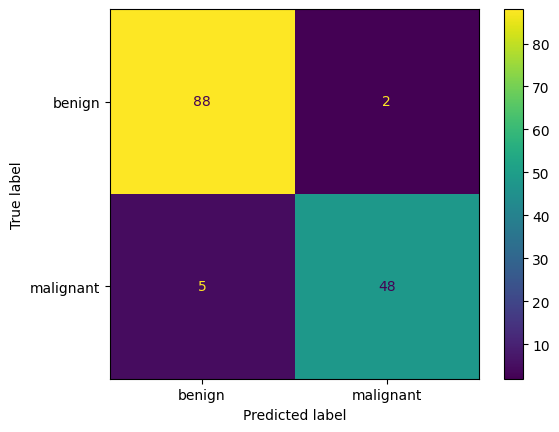

None


In [44]:
LR_pred = LR.predict(X_test)

print("Prediction Score of Logistic Regression Model tested on Testing Set:", accuracy_score(Y_test, LR_pred))
print(visualise_cm(LR_pred, Y_test))

# **Evaluator Function**

In [32]:
def lr_evaluator(X, Y, model):
    kf = KFold(10, shuffle=True, random_state=1)
    pred = np.array([])
    actual = np.array([])
    accuracy = np.array([])
    precision = np.array([])
    recall = np.array([])
    for train, test in kf.split(X):
        x_train, y_train, x_test, y_test = X[train], Y[train], X[test], Y[test]
        model.fit(x_train, y_train)
        pred_i = model.predict(x_test)
        pred = np.append(pred, pred_i)
        actual = np.append(actual, y_test)
        accuracy = np.append(accuracy, [accuracy_score(y_test, pred_i)])
        precision = np.append(precision, [precision_score(y_test, pred_i)])
        recall = np.append(recall, [recall_score(y_test, pred_i)])
    return pred, actual, accuracy, precision, recall

When you run the code below, you will get the Confusion Matrix after 10-Fold Cross Validation as well as the average metric scores:

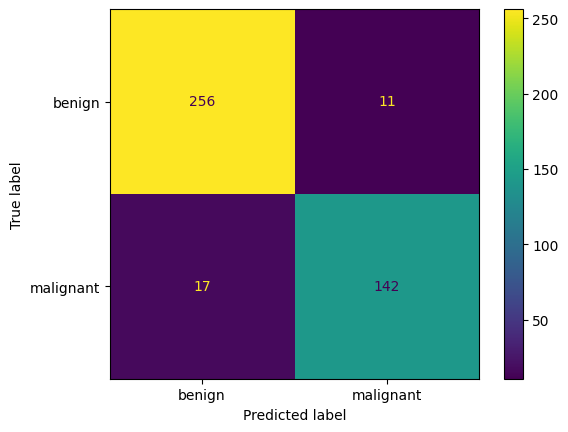

None
Average Accuracy Score after 10-fold Cross Validation for Logistic Regression: 0.9342746400885936
Average Precision Score after 10-fold Cross Validation for Logistic Regression: 0.9262557153888423
Average Recall Score after 10-fold Cross Validation for Logistic Regression: 0.89356436691963


In [33]:
pred_LR, actual_LR, accuracy_LR, precision_LR, recall_LR = lr_evaluator(X_train, Y_train, LR)

print(visualise_cm(pred_LR, actual_LR))
print("Average Accuracy Score after 10-fold Cross Validation for Logistic Regression:", accuracy_LR.mean())
print("Average Precision Score after 10-fold Cross Validation for Logistic Regression:", precision_LR.mean())
print("Average Recall Score after 10-fold Cross Validation for Logistic Regression:", recall_LR.mean())

# **k-nearest Neighbors Model**

When you run the code below, the sklearn KNeighborsClassifier function will be implemented and train using the training dataset. It will then predict, based on the testing dataset, whether a patient has breast cancer:

In [34]:
# function to find the optimal k value for k-nearest neighbors algorithm
def k_finder(X_test, Y_test, X_train, Y_train):
    error = []
    for i in range(1, len(X_test)):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, Y_train)
        pred = knn.predict(X_test)
        e = mean_absolute_error(Y_test, pred)
        error.append(e)
    return np.array(error).argmin() + 1

#KNN Model
knn = KNeighborsClassifier(n_neighbors=k_finder(X_test, Y_test, X_train, Y_train))

knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

When you run the code below, the model is tested on the testing set and shows the visual representation of the confusion matrix as well as the prediction score

Prediction Score of KNN Model tested on Testing Set: 0.951048951048951


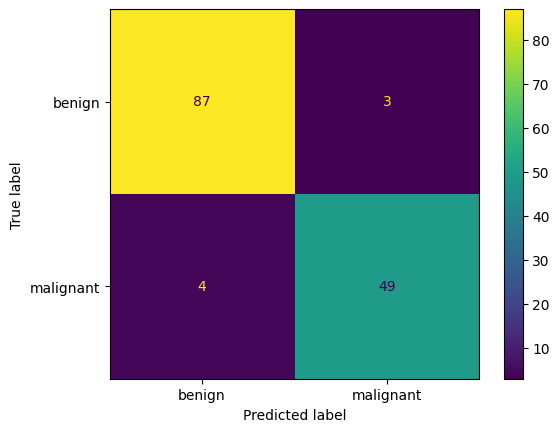

None


In [43]:
knn_pred = knn.predict(X_test)

print("Prediction Score of KNN Model tested on Testing Set:", accuracy_score(Y_test, knn_pred))
print(visualise_cm(knn_pred, Y_test))

# **Evaluator Function**

In [36]:
def knn_evaluator(X, Y, model):
    kf = KFold(10, shuffle=True, random_state=1)
    pred = np.array([])
    actual = np.array([])
    accuracy = np.array([])
    precision = np.array([])
    recall = np.array([])
    for train, test in kf.split(X):
        x_train, y_train, x_test, y_test = X[train], Y[train], X[test], Y[test]
        model.fit(x_train, y_train)
        pred_i = model.predict(x_test)
        pred = np.append(pred, pred_i)
        actual = np.append(actual, y_test)
        accuracy = np.append(accuracy, [accuracy_score(y_test, pred_i)])
        precision = np.append(precision, [precision_score(y_test, pred_i)])
        recall = np.append(recall, [recall_score(y_test, pred_i)])
    return pred, actual, accuracy, precision, recall

When you run the code below, you will get the Confusion Matrix after 10-Fold Cross Validation as well as the average metric scores:

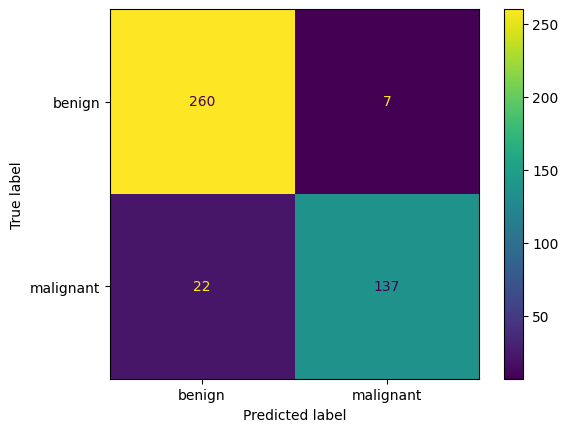

None
Average Accuracy Score after 10-fold Cross Validation for KNN: 0.9318936877076412
Average Precision Score after 10-fold Cross Validation for KNN: 0.9496572506440927
Average Recall Score after 10-fold Cross Validation for KNN: 0.8628250185487026


In [37]:
pred_knn, actual_knn, accuracy_knn, precision_knn, recall_knn = knn_evaluator(X_train, Y_train, knn)

print(visualise_cm(pred_knn, actual_knn))
print("Average Accuracy Score after 10-fold Cross Validation for KNN:", accuracy_knn.mean())
print("Average Precision Score after 10-fold Cross Validation for KNN:", precision_knn.mean())
print("Average Recall Score after 10-fold Cross Validation for KNN:", recall_knn.mean())

# **Neural Network Model**

When you run the code below, the keras neural network model will be implemented.

In [38]:
nn_model = keras.models.Sequential()
nn_model.add(keras.layers.InputLayer(input_shape = [9]))
nn_model.add(keras.layers.Dense(30,activation = 'relu'))
nn_model.add(keras.layers.Dense(1,activation = 'sigmoid'))
nn_model.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics = ['accuracy'])

nn_model.fit(X_train, Y_train, batch_size=1, epochs=10, verbose=0)

When you run the code below, the model is tested on the testing set and shows the visual representation of the confusion matrix as well as the prediction score:

5/5 [==============================] - 0s 17ms/step
Prediction Score of Neural Network Model tested on Testing Set: 0.951048951048951


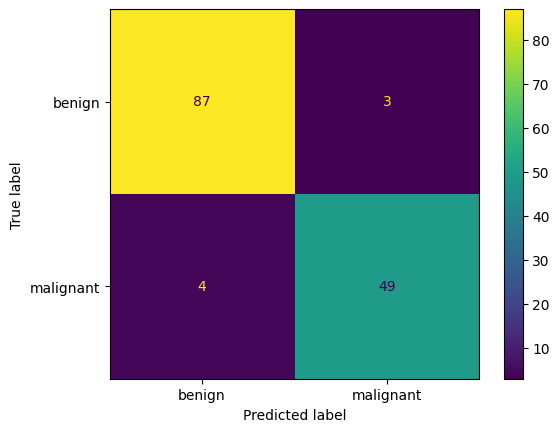

None


In [42]:
nn_pred = nn_model.predict(X_test)>0.5
print("Prediction Score of Neural Network Model tested on Testing Set:", accuracy_score(Y_test, nn_pred))
print(visualise_cm(nn_pred, Y_test))

# **Evaluator Function**

In [ ]:
def nn_evaluator(X, Y, model):
    kf = KFold(10, shuffle=True, random_state=1)
    pred = np.array([])
    actual = np.array([])
    accuracy = np.array([])
    precision = np.array([])
    recall = np.array([])
    for train, test in kf.split(X):
        x_train, y_train, x_test, y_test = X[train], Y[train], X[test], Y[test]
        model.fit(x_train,y_train,batch_size = 1,epochs = 10,verbose = 0)
        pred_i = model.predict(x_test) > 0.5
        pred = np.append(pred, pred_i)
        actual = np.append(actual, y_test)
        accuracy = np.append(accuracy, [accuracy_score(y_test, pred_i)])
        precision = np.append(precision, [precision_score(y_test, pred_i)])
        recall = np.append(recall, [recall_score(y_test, pred_i)])
    return pred, actual, accuracy, precision, recall

When you run the code below, you will get the Confusion Matrix after 10-Fold Cross Validation as well as the average metric scores:

2/2 [==============================] - 0s 8ms/step


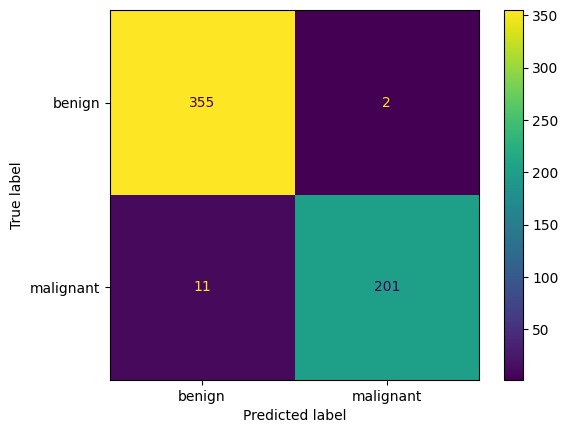

None
Average Accuracy Score after 10-fold Cross Validation for NN: 0.9771303258145363
Average Precision Score after 10-fold Cross Validation for NN: 0.9906926406926407
Average Recall Score after 10-fold Cross Validation for NN: 0.9490326607031412


In [14]:
pred_nn, actual_nn, accuracy_nn, precision_nn, recall_nn = nn_evaluator(X_train, Y_train, nn_model)

print(visualise_cm(pred_nn, actual_nn))
print("Average Accuracy Score after 10-fold Cross Validation for NN:", accuracy_nn.mean())
print("Average Precision Score after 10-fold Cross Validation for NN:", precision_nn.mean())
print("Average Recall Score after 10-fold Cross Validation for NN:", recall_nn.mean())